In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
f=pd.read_csv("Salary_Data.csv")
f

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
f.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1dabfaf4160>,
 'caps': [<matplotlib.lines.Line2D at 0x1dabfa155e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dabfb14580>],
 'medians': [<matplotlib.lines.Line2D at 0x1dabf88bcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dabf8bda30>],
 'means': []}

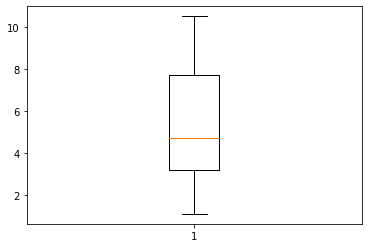

In [5]:
plt.boxplot(f.YearsExperience)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dac1e8a130>,
 'caps': [<matplotlib.lines.Line2D at 0x1dac1f20280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dac1e8a160>],
 'medians': [<matplotlib.lines.Line2D at 0x1dac1f12ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dac1f124f0>],
 'means': []}

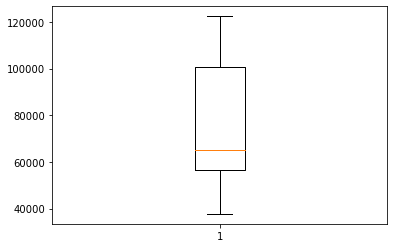

In [6]:
plt.boxplot(f.Salary)

Text(0, 0.5, 'salary')

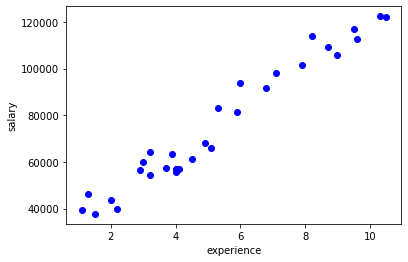

In [9]:
plt.plot(f.YearsExperience,f.Salary,'bo');
plt.xlabel("experience");
plt.ylabel("salary")

In [10]:
f.Salary.corr(f.YearsExperience)

0.9782416184887598

In [11]:
model=smf.ols('Salary~YearsExperience',data=f).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.14e-20
Time:                        13:07:55   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
pred=model.predict(f.YearsExperience)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [15]:
resid=model.resid_pearson
resid

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

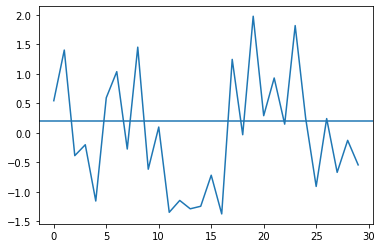

In [17]:
plt.plot(resid)
plt.axhline(y=0.2)